**INITIAL TASK: DATA PREPROCESSING**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

**Data Cleaning**

In [2]:
file_path = '/content/LoanExport.csv'
df = pd.read_csv(file_path)

<ipython-input-2-547cdcbf19a3>:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [3]:
irrelevant_columns = [
    'PostalCode', 'LoanSeqNum', 'FirstPaymentDate', 'MaturityDate',
    'MSA', 'ServicerName', 'SellerName'
]
df_cleaned = df.drop(columns=irrelevant_columns)

In [4]:
df_cleaned = df_cleaned.dropna()

**Data Encoding**

In [5]:
categorical_cols = ['FirstTimeHomebuyer', 'Occupancy', 'Channel', 'PPM', 'ProductType',
                    'PropertyState', 'PropertyType', 'LoanPurpose', 'NumBorrowers']
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

In [6]:
print("Original class distribution:")
print(df_cleaned['EverDelinquent'].value_counts())

Original class distribution:
EverDelinquent
0    233788
1     57663
Name: count, dtype: int64


In [7]:
majority_class = df_cleaned[df_cleaned['EverDelinquent'] == 0]
minority_class = df_cleaned[df_cleaned['EverDelinquent'] == 1]
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
df_balanced = pd.concat([majority_class, minority_upsampled])

In [8]:
print("Balanced class distribution:")
print(df_balanced['EverDelinquent'].value_counts())

Balanced class distribution:
EverDelinquent
0    233788
1    233788
Name: count, dtype: int64


**Data Visualization**

In [17]:
mortgages_to_trade = df[(df['CreditScore'] > 700) & (df['DTI'] < 30)].copy()

In [18]:
np.random.seed(42)
mortgages_to_trade['BidAmount'] = mortgages_to_trade['OrigInterestRate'] * 1000 + np.random.normal(0, 1000, len(mortgages_to_trade))

In [19]:
mortgages_to_trade.loc[:, 'OrigUPB'] = mortgages_to_trade['OrigUPB'].astype(float)
mortgages_to_trade.loc[:, 'TradeExecuted'] = mortgages_to_trade['BidAmount'] > (1.05 * mortgages_to_trade['OrigUPB'])


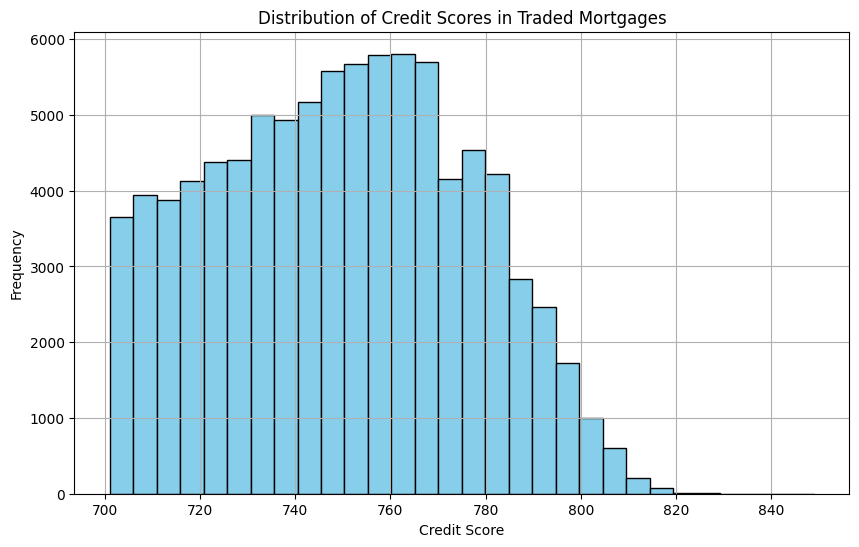

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(mortgages_to_trade['CreditScore'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Credit Scores in Traded Mortgages')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


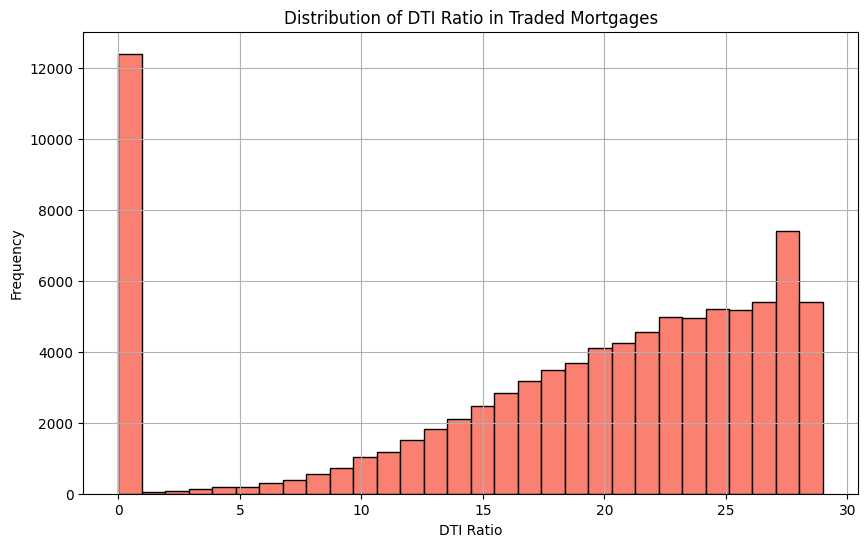

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(mortgages_to_trade['DTI'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of DTI Ratio in Traded Mortgages')
plt.xlabel('DTI Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


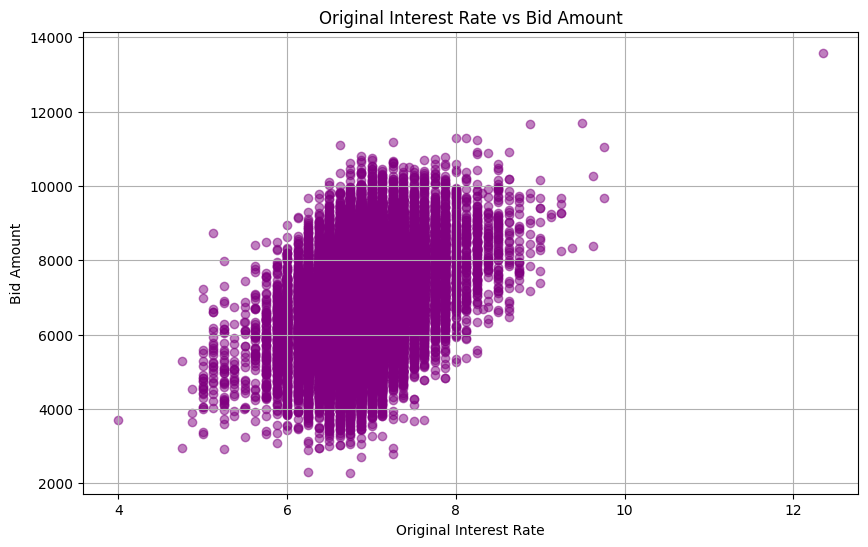

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(mortgages_to_trade['OrigInterestRate'], mortgages_to_trade['BidAmount'], color='purple', alpha=0.5)
plt.title('Original Interest Rate vs Bid Amount')
plt.xlabel('Original Interest Rate')
plt.ylabel('Bid Amount')
plt.grid(True)
plt.show()

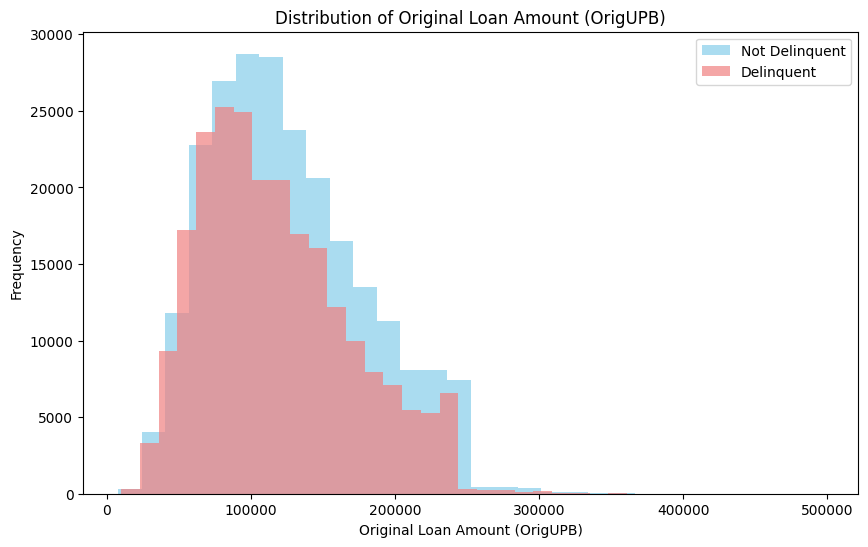

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df_balanced[df_balanced['EverDelinquent'] == 0]['OrigUPB'], bins=30, alpha=0.7, label='Not Delinquent', color='skyblue')
plt.hist(df_balanced[df_balanced['EverDelinquent'] == 1]['OrigUPB'], bins=30, alpha=0.7, label='Delinquent', color='lightcoral')
plt.title('Distribution of Original Loan Amount (OrigUPB)')
plt.xlabel('Original Loan Amount (OrigUPB)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**SECOND TASK: MODEL BUILDING AND EVALUATION**

In [25]:
X = df_balanced.drop(columns=['EverDelinquent'])
y = df_balanced['EverDelinquent']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = LogisticRegression(max_iter=1000, penalty='l2', C=0.01)
model.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000)

In [42]:
y_pred = model.predict(X_test)

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [44]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[46666     0]
 [    0 46850]]
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46666
           1       1.00      1.00      1.00     46850

    accuracy                           1.00     93516
   macro avg       1.00      1.00      1.00     93516
weighted avg       1.00      1.00      1.00     93516

